In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Replace with the correct path to your Excel file
file_path = '/content/drive/My Drive/Stats Project/Road_Policing_Data_v3.csv'

# Read the file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df[100:110])

print(df.columns)

     Year Month  Traffic_Accident_Fatalities  Dangerous_Driving  Seatbelts  \
100  2016   May                           20              396.0     1023.0   
101  2016  June                           11              246.0      775.0   
102  2016  July                           19              235.0      803.0   
103  2016   Aug                           13              263.0      699.0   
104  2016  Sept                           17              253.0      735.0   
105  2016   Oct                           20              237.0        NaN   
106  2016   Nov                            9                NaN        NaN   
107  2016   Dec                           18                NaN        NaN   
108  2017   Jan                           17              453.0      798.0   
109  2017   Feb                           11              444.0      788.0   

     Mobile_Phones  Speeding  Population_of_Ireland_in_Thousands  
100         3359.0   16362.0                              4739.6  
101    

In [4]:
import plotly.express as px
# Creating a new column 'Month_Year' by combining 'Month' and 'Year' columns
df['Month_Year'] = df['Month'] + ' ' + df['Year'].astype(str)
df['Traffic_Accident_Fatalities_per_Million'] = (df['Traffic_Accident_Fatalities'] / (df['Population_of_Ireland_in_Thousands']) * 1000)

# Creating the line chart with the new 'Month_Year' column
fig = px.line(df, x='Month_Year', y='Traffic_Accident_Fatalities_per_Million', title='Monthly Traffic Accident Fatalities Over Years in Ireland')

fig.show()

In [5]:
from scipy import stats

# Calculating the required statistics for the 'Traffic_Accident_Fatalities_per_Million' column
statistics = {
    'Total Accident Fatalities from Jan 2008 to July 2003': df['Traffic_Accident_Fatalities'].sum().round(0),
    'Mean Trafic Fatalities per Month per Million': df['Traffic_Accident_Fatalities_per_Million'].mean(),
    'Median': df['Traffic_Accident_Fatalities_per_Million'].median(),
    'Mode': df['Traffic_Accident_Fatalities_per_Million'].mode()[0],  # Taking the first mode
    'Variance': df['Traffic_Accident_Fatalities_per_Million'].var(),
    'Standard Deviation': df['Traffic_Accident_Fatalities_per_Million'].std(),
    'Min': df['Traffic_Accident_Fatalities_per_Million'].min(),
    'Max': df['Traffic_Accident_Fatalities_per_Million'].max(),
    'Range': df['Traffic_Accident_Fatalities_per_Million'].max() - df['Traffic_Accident_Fatalities_per_Million'].min()
}

statistics_df = pd.DataFrame(statistics.items(), columns=['Statistic', 'Value'])

# Displaying the DataFrame
print(statistics_df)

                                           Statistic        Value
0  Total Accident Fatalities from Jan 2008 to Jul...  2771.000000
1       Mean Trafic Fatalities per Month per Million     3.131262
2                                             Median     3.033783
3                                               Mode     2.218413
4                                           Variance     1.383127
5                                 Standard Deviation     1.176064
6                                                Min     0.591168
7                                                Max     7.903750
8                                              Range     7.312582


In [6]:
annual_fatalities_avg_per_month = df.groupby('Year')['Traffic_Accident_Fatalities_per_Million'].mean()

# Displaying the result
print(annual_fatalities_avg_per_month)

Year
2008    5.183831
2009    4.374936
2010    3.878692
2011    3.388052
2012    2.938807
2013    3.394948
2014    3.444267
2015    2.879816
2016    3.199989
2017    2.684875
2018    2.320075
2019    2.369668
2020    2.435436
2021    2.216880
2022    2.491641
2023    2.731856
Name: Traffic_Accident_Fatalities_per_Million, dtype: float64


In [7]:
# Creating the line chart with the new 'Month_Year' column
print((annual_fatalities_avg_per_month.index))
print((annual_fatalities_avg_per_month.values))

# Creating a line chart using Plotly
fig = px.line(annual_fatalities_avg_per_month, title='Average Annual Traffic Fatalities per Million per Month in Ireland')

# Updating the axes labels
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Average Fatalities per Million per Month')

# Showing the plot
fig.show()


Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021, 2022, 2023],
           dtype='int64', name='Year')
[5.18383091 4.37493566 3.87869208 3.3880522  2.9388075  3.39494803
 3.44426745 2.87981569 3.19998875 2.68487532 2.32007479 2.36966825
 2.43543609 2.21687982 2.49164095 2.73185615]


In [8]:
# Calculating the year-on-year change in the values
year_on_year_change = annual_fatalities_avg_per_month.pct_change() * 100

# Displaying the result
print(year_on_year_change)

print(year_on_year_change.mean())
print(year_on_year_change.std())

Year
2008          NaN
2009   -15.604198
2010   -11.342877
2011   -12.649622
2012   -13.259675
2013    15.521280
2014     1.452730
2015   -16.388151
2016    11.117831
2017   -16.097351
2018   -13.587243
2019     2.137580
2020     2.775403
2021    -8.974010
2022    12.394047
2023     9.640843
Name: Traffic_Accident_Fatalities_per_Million, dtype: float64
-3.524227497903339
11.771577207037957


In [9]:
year_on_year_change_statistics = {
    'Mean': year_on_year_change.mean(),
    'Standard Deviation': year_on_year_change.std(),
    'Min': year_on_year_change.min(),
    'Max': year_on_year_change.max(),
    'Range': year_on_year_change.max() - year_on_year_change.min()
}

# Displaying the results

print(year_on_year_change_statistics)

{'Mean': -3.524227497903339, 'Standard Deviation': 11.771577207037957, 'Min': -16.388151158325883, 'Max': 15.521279689409084, 'Range': 31.909430847734967}


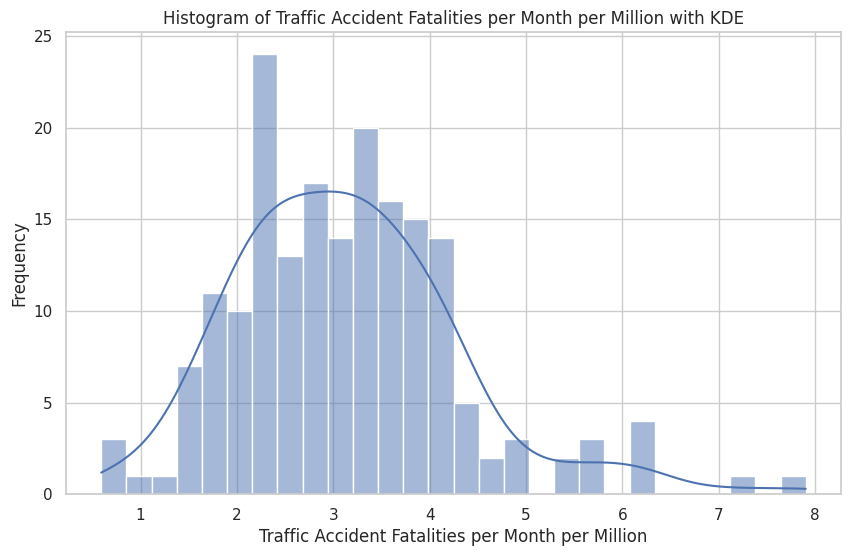

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a histogram of Traffic Accident Fatalities per Million with KDE using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Traffic_Accident_Fatalities_per_Million'], kde=True, bins=28)
plt.title('Histogram of Traffic Accident Fatalities per Month per Million with KDE')
plt.xlabel('Traffic Accident Fatalities per Month per Million')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [11]:
months_order = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

# Grouping by 'Month' and calculating the mean of 'Traffic_Accident_Fatalities_per_Million'
mean_monthly_fatalities = df.groupby('Month')['Traffic_Accident_Fatalities_per_Million'].mean()

# Displaying the result
print(mean_monthly_fatalities)


Month
Jan      3.162040
Feb      2.979674
March    3.127225
April    2.726248
May      3.094164
June     3.103271
July     3.442760
Aug      3.305137
Sept     2.953564
Oct      3.362976
Nov      3.017671
Dec      3.319306
Name: Traffic_Accident_Fatalities_per_Million, dtype: float64


<ipython-input-12-f7f24b2da3a4>:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-12-f7f24b2da3a4>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




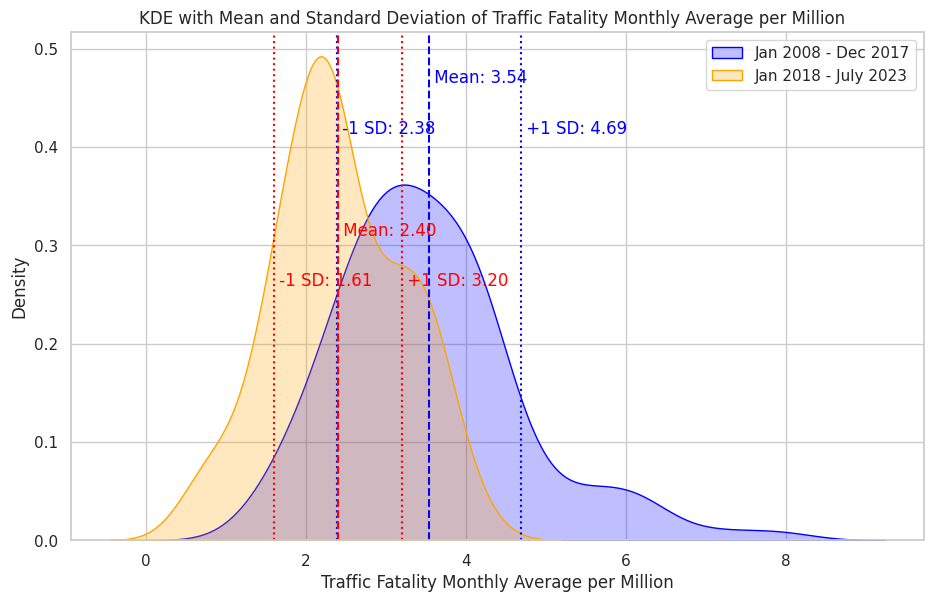


***********************
Jan 2008 - Dec 2017
Mean:  3.54
Standard Deviation 1.15

***********************
Jan 2018 - July 2023
Mean:  2.4
Standard Deviation 0.8


In [12]:
# Two population Test:
from scipy import stats
import pandas as pd
import numpy as np

# Assuming df is your dataframe

# Splitting the dataset into two groups based on the time frames
time_frame1 = df[(df['Year'] >= 2008) & (df['Year'] <= 2017)]['Traffic_Accident_Fatalities_per_Million']
time_frame2 = df[(df['Year'] >= 2018) & (df['Year'] <= 2023)]['Traffic_Accident_Fatalities_per_Million']


# Calculate mean and standard deviation for both time frames
mean1, std1 = np.mean(time_frame1), np.std(time_frame1)
mean2, std2 = np.mean(time_frame2), np.std(time_frame2)

# Plotting KDE for both time frames
plt.figure(figsize=(11, 6.6))
sns.kdeplot(time_frame1, shade=True, color="blue", label="Jan 2008 - Dec 2017")
sns.kdeplot(time_frame2, shade=True, color="orange", label="Jan 2018 - July 2023")



# Annotating mean and standard deviation on the plot for time frame 1
plt.axvline(mean1, color="blue", linestyle="--")
plt.text(mean1, plt.ylim()[1]*0.9, f" Mean: {mean1:.2f}", color="blue")
plt.axvline(mean1 + std1, color="blue", linestyle=":")
plt.axvline(mean1 - std1, color="blue", linestyle=":")
plt.text(mean1 + std1, plt.ylim()[1]*0.8, f" +1 SD: {mean1 + std1:.2f}", color="blue")
plt.text(mean1 - std1, plt.ylim()[1]*0.8, f" -1 SD: {mean1 - std1:.2f}", color="blue")

# Annotating mean and standard deviation on the plot for time frame 2
plt.axvline(mean2, color="red", linestyle="--")
plt.text(mean2, plt.ylim()[1]*0.6, f" Mean: {mean2:.2f}", color="red")
plt.axvline(mean2 + std2, color="red", linestyle=":")
plt.axvline(mean2 - std2, color="red", linestyle=":")
plt.text(mean2 + std2, plt.ylim()[1]*0.5, f" +1 SD: {mean2 + std2:.2f}", color="red")
plt.text(mean2 - std2, plt.ylim()[1]*0.5, f" -1 SD: {mean2 - std2:.2f}", color="red")

# Finalizing the plot
plt.title("KDE with Mean and Standard Deviation of Traffic Fatality Monthly Average per Million  ")
plt.xlabel("Traffic Fatality Monthly Average per Million")
plt.ylabel("Density")
plt.legend()
plt.show()

print("\n***********************")
print("Jan 2008 - Dec 2017")
print("Mean: ",round(mean1,2))
print("Standard Deviation",round(std1,2))

print("\n***********************")
print("Jan 2018 - July 2023")
print("Mean: ",round(mean2,2))
print("Standard Deviation",round(std2,2))



<ipython-input-13-c1b6cfcabce4>:35: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-13-c1b6cfcabce4>:36: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-13-c1b6cfcabce4>:37: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




               df      sum_sq    mean_sq          F        PR(>F)
Time_Frame    2.0   75.858989  37.929494  38.472569  1.098279e-14
Residual    184.0  181.402677   0.985884        NaN           NaN


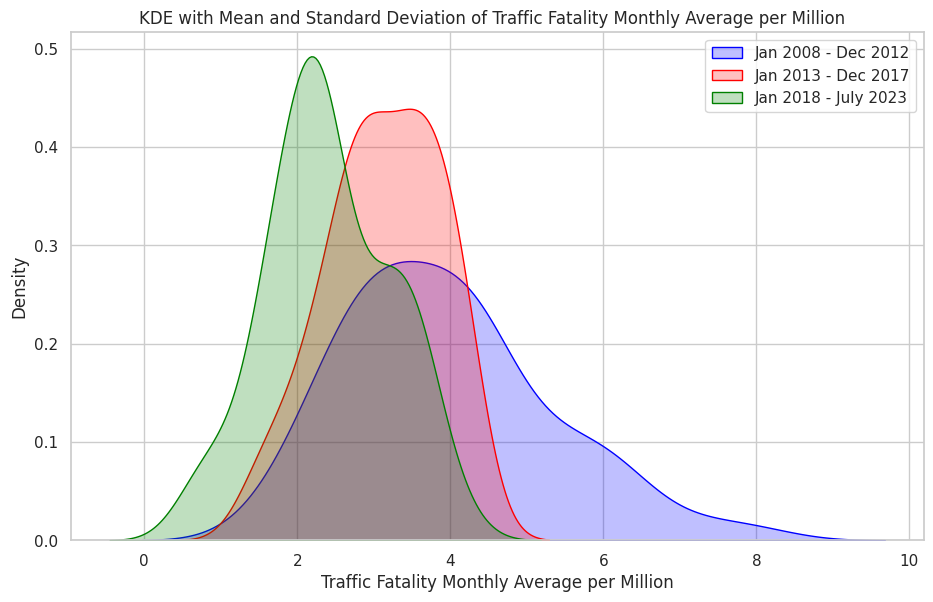


***********************
Jan 2008 - Dec 2012
Mean:  3.95
Standard Deviation 1.33

***********************
Jan 2013 - Dec 2017
Mean:  3.12
Standard Deviation 0.74

***********************
Jan 2018 - July 2023
Mean:  2.4
Standard Deviation 0.8


In [13]:
def assign_time_period(year):
    if 2008 <= year <= 2012:
        return '2008-2012'
    elif 2013 <= year <= 2017:
        return '2013-2017'
    elif 2018 <= year <= 2023:
        return '2018-2023'
    else:
        return 'Unknown'  # For any year outside the specified range

# Apply the function to the 'Year' column to create the 'Time_Period' column
df['Time_Frame'] = df['Year'].apply(assign_time_period)

df_anova = df[['Traffic_Accident_Fatalities_per_Million','Year','Time_Frame']]

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame and it contains a 'Year' column and a 'Fatalities_per_Million' column
# Also assuming you have a column 'Time_Frame' indicating the time frame for each observation


# Splitting the dataset into two groups based on the time frames
time_frame1 = df[(df['Year'] >= 2008) & (df['Year'] <= 2012)]['Traffic_Accident_Fatalities_per_Million']
time_frame2 = df[(df['Year'] >= 2013) & (df['Year'] <= 2017)]['Traffic_Accident_Fatalities_per_Million']
time_frame3 = df[(df['Year'] >= 2018) & (df['Year'] <= 2023)]['Traffic_Accident_Fatalities_per_Million']

# Calculate mean and standard deviation for both time frames
mean1, std1 = np.mean(time_frame1), np.std(time_frame1)
mean2, std2 = np.mean(time_frame2), np.std(time_frame2)
mean3, std3 = np.mean(time_frame3), np.std(time_frame3)

# Plotting KDE for both time frames
plt.figure(figsize=(11, 6.6))
sns.kdeplot(time_frame1, shade=True, color="blue", label="Jan 2008 - Dec 2012")
sns.kdeplot(time_frame2, shade=True, color="red", label="Jan 2013 - Dec 2017")
sns.kdeplot(time_frame3, shade=True, color="green", label="Jan 2018 - July 2023")

# Conducting ANOVA
model = ols('Traffic_Accident_Fatalities_per_Million ~ Time_Frame', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

# Displaying the ANOVA table
print(anova_table)

plt.title("KDE with Mean and Standard Deviation of Traffic Fatality Monthly Average per Million  ")
plt.xlabel("Traffic Fatality Monthly Average per Million")
plt.ylabel("Density")
plt.legend()
plt.show()

print("\n***********************")
print("Jan 2008 - Dec 2012")
print("Mean: ",round(mean1,2))
print("Standard Deviation",round(std1,2))

print("\n***********************")
print("Jan 2013 - Dec 2017")
print("Mean: ",round(mean2,2))
print("Standard Deviation",round(std2,2))

print("\n***********************")
print("Jan 2018 - July 2023")
print("Mean: ",round(mean3,2))
print("Standard Deviation",round(std3,2))



In [14]:
from scipy import stats

# Assuming 'df' is your DataFrame and it contains a 'Year' column and a 'Fatalities_per_Million' column
# Split the data into two groups
time_frame_1 = df[(df['Year'] >= 2008) & (df['Year'] <= 2017)]['Traffic_Accident_Fatalities_per_Million']
time_frame_2 = df[(df['Year'] >= 2018) & (df['Year'] <= 2023)]['Traffic_Accident_Fatalities_per_Million']

# Perform Levene's test to check for equal variances
levene_stat, levene_p = stats.levene(time_frame_1, time_frame_2)

# Perform the independent t-test (Welch's t-test if variances are not equal)
t_stat, p_value = stats.ttest_ind(time_frame_1, time_frame_2, equal_var=(levene_p > 0.05))

# Print the results
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 7.839459929764484, P-value: 4.155675970394681e-13


In [15]:
# Dropping null or NaN records from the dataset
df_cleaned = df.dropna()

# Displaying the first few rows of the cleaned DataFrame to confirm the operation
print(df_cleaned[100:110])

     Year  Month  Traffic_Accident_Fatalities  Dangerous_Driving  Seatbelts  \
100  2016    May                           20              396.0     1023.0   
101  2016   June                           11              246.0      775.0   
102  2016   July                           19              235.0      803.0   
103  2016    Aug                           13              263.0      699.0   
104  2016   Sept                           17              253.0      735.0   
108  2017    Jan                           17              453.0      798.0   
109  2017    Feb                           11              444.0      788.0   
110  2017  March                           20              554.0     1042.0   
111  2017  April                            7              543.0     1304.0   
112  2017    May                            8              518.0     1113.0   

     Mobile_Phones  Speeding  Population_of_Ireland_in_Thousands  Month_Year  \
100         3359.0   16362.0                      

In [16]:
['Dangerous_Driving','Seatbelts', 'Mobile_Phones', 'Speeding']

# Converting the relevant columns to numeric data type
df_cleaned['Dangerous_Driving'] = pd.to_numeric(df_cleaned['Dangerous_Driving'], errors='coerce')
df_cleaned['Seatbelts'] = pd.to_numeric(df_cleaned['Seatbelts'], errors='coerce')
df_cleaned['Mobile_Phones'] = pd.to_numeric(df_cleaned['Mobile_Phones'], errors='coerce')
df_cleaned['Speeding'] = pd.to_numeric(df_cleaned['Speeding'], errors='coerce')

df_cleaned['Dangerous_Driving_per_Million'] = (df_cleaned['Dangerous_Driving'] / (df_cleaned['Population_of_Ireland_in_Thousands']) * 1000)
df_cleaned['Seatbelts_per_Million'] = (df_cleaned['Seatbelts'] / (df_cleaned['Population_of_Ireland_in_Thousands']) * 1000)
df_cleaned['Mobile_Phones_per_Million'] = (df_cleaned['Mobile_Phones'] / (df_cleaned['Population_of_Ireland_in_Thousands']) * 1000)
df_cleaned['Speeding_per_Million'] = (df_cleaned['Speeding'] / (df_cleaned['Population_of_Ireland_in_Thousands']) * 1000)

print(df_cleaned.head())


   Year  Month  Traffic_Accident_Fatalities  Dangerous_Driving  Seatbelts  \
0  2008    Jan                           25             1272.0     2164.0   
1  2008    Feb                           32             1307.0     3371.0   
2  2008  March                           20              886.0     2768.0   
3  2008  April                           19              743.0     2895.0   
4  2008    May                           19              792.0     3287.0   

   Mobile_Phones  Speeding  Population_of_Ireland_in_Thousands  Month_Year  \
0         3225.0   11543.0                              4485.1    Jan 2008   
1         3533.0   13314.0                              4485.1    Feb 2008   
2         3122.0   16629.0                              4485.1  March 2008   
3         4105.0   16911.0                              4485.1  April 2008   
4         4230.0   19622.0                              4485.1    May 2008   

   Traffic_Accident_Fatalities_per_Million Time_Frame  \
0          

<ipython-input-16-0fcd49f1c92c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-0fcd49f1c92c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-0fcd49f1c92c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-0fcd49f

In [17]:
fig = px.line(df_cleaned,
              x='Month_Year',
              y=['Dangerous_Driving_per_Million', 'Seatbelts_per_Million', 'Mobile_Phones_per_Million', 'Speeding_per_Million'],
              title='Trends in Traffic Related Incidents per Million Over Time')

# Updating the axes labels
fig.update_xaxes(title_text='Month and Year')
fig.update_yaxes(title_text='Incidents per Million')

# Showing the plot
fig.show()

In [18]:
# Grouping by 'Year' and calculating the yearly total for each column
yearly_totals = df_cleaned.groupby('Year')[['Dangerous_Driving_per_Million', 'Seatbelts_per_Million',
                                            'Mobile_Phones_per_Million', 'Speeding_per_Million']].mean()

# Displaying the yearly totals
print(yearly_totals)

      Dangerous_Driving_per_Million  Seatbelts_per_Million  \
Year                                                         
2008                     168.966876             533.711623   
2009                     121.156307             376.704019   
2010                     107.944732             318.034454   
2011                      96.468411             286.399703   
2012                      78.712875             250.959648   
2013                      62.084209             217.132208   
2014                      42.766321             206.530475   
2015                      44.726026             192.538789   
2016                      73.377031             174.205981   
2017                      90.333063             190.141138   
2018                     112.557746             198.519929   
2019                      99.307586             189.993614   
2020                     107.523675             145.446894   
2021                     112.978764             119.481611   
2022    

In [19]:
yearly_totals_pct_change = yearly_totals.pct_change() * 100

# This will result in NaN values for the first row, as there is no preceding year to compare with.

# Display the year-on-year percentage changes
print(yearly_totals_pct_change)

      Dangerous_Driving_per_Million  Seatbelts_per_Million  \
Year                                                         
2008                            NaN                    NaN   
2009                     -28.295824             -29.418060   
2010                     -10.904570             -15.574446   
2011                     -10.631664              -9.946957   
2012                     -18.405544             -12.374334   
2013                     -21.125725             -13.479235   
2014                     -31.115623              -4.882617   
2015                       4.582357              -6.774635   
2016                      64.058910              -9.521618   
2017                      23.108092               9.147308   
2018                      24.603044               4.406617   
2019                     -11.771877              -4.294942   
2020                       8.273375             -23.446430   
2021                       5.073384             -17.852071   
2022    

In [20]:
# First, we'll calculate the total of the fines for each year.
yearly_totals['Total_Fines_per_Million'] = yearly_totals.sum(axis=1)

print(yearly_totals)

# Now, we'll calculate the percentage share of each fine type from the total.
for fine_type in ['Dangerous_Driving_per_Million', 'Seatbelts_per_Million',
                  'Mobile_Phones_per_Million', 'Speeding_per_Million']:
    yearly_totals[fine_type + '_Pct'] = (yearly_totals[fine_type] / yearly_totals['Total_Fines_per_Million']) * 100

print(yearly_totals)

      Dangerous_Driving_per_Million  Seatbelts_per_Million  \
Year                                                         
2008                     168.966876             533.711623   
2009                     121.156307             376.704019   
2010                     107.944732             318.034454   
2011                      96.468411             286.399703   
2012                      78.712875             250.959648   
2013                      62.084209             217.132208   
2014                      42.766321             206.530475   
2015                      44.726026             192.538789   
2016                      73.377031             174.205981   
2017                      90.333063             190.141138   
2018                     112.557746             198.519929   
2019                      99.307586             189.993614   
2020                     107.523675             145.446894   
2021                     112.978764             119.481611   
2022    

In [21]:
fig = px.line(yearly_totals,
              x= yearly_totals.index,
              y=['Dangerous_Driving_per_Million', 'Seatbelts_per_Million', 'Mobile_Phones_per_Million', 'Speeding_per_Million'],
              title='Figure 4. Trends in Average Monthly Traffic Fines issued per Million in a given Year over Time',
              labels={'variable': 'Traffic Fines Type'})

# Updating the axes labels
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Average Monthly Traffic fines issued per Million')

# Updating the layout size
fig.update_layout(width=920, height=600)

# Updating the legend orientation to horizontal and positioning at the top
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.22,
    xanchor="right",
    x=1
))


# Showing the plot
fig.show()

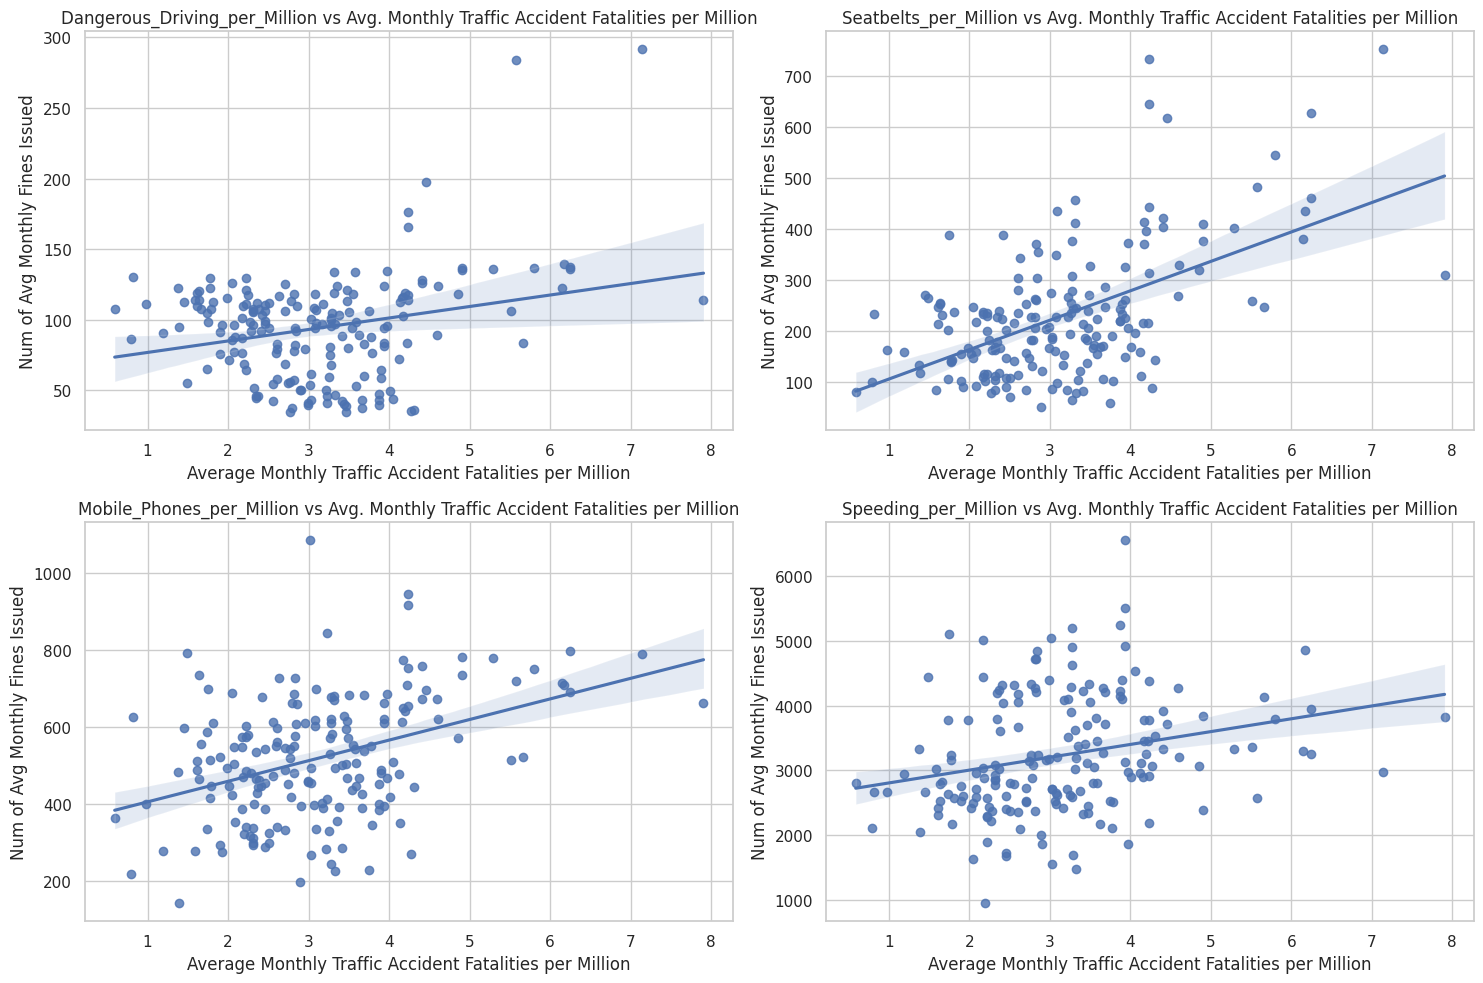

In [22]:
sns.set(style="whitegrid")

# List of columns to plot against 'Traffic_Accident_Fatalities_per_Million'
y_columns = ['Dangerous_Driving_per_Million', 'Seatbelts_per_Million', 'Mobile_Phones_per_Million', 'Speeding_per_Million']

# Creating 4 scatter plots with regression lines
plt.figure(figsize=(15, 10))

for i, col in enumerate(y_columns, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=df_cleaned['Traffic_Accident_Fatalities_per_Million'], y=df_cleaned[col])
    plt.title(f'{col} vs Avg. Monthly Traffic Accident Fatalities per Million')
    plt.xlabel('Average Monthly Traffic Accident Fatalities per Million')
    plt.ylabel('Num of Avg Monthly Fines Issued')

# Adjusting layout
plt.tight_layout()

# Displaying the plots
plt.show()

In [23]:
import statsmodels.api as sm

# Setting the dependent variable
y = df_cleaned['Traffic_Accident_Fatalities_per_Million']

# Example for one independent variable: 'Dangerous_Driving_per_Million'
x = df_cleaned[['Dangerous_Driving_per_Million']]

# Adding a constant to the independent variable
x = sm.add_constant(x)

# Creating the model
model = sm.OLS(y, x)

# Fitting the model
results = model.fit()


# Getting the summary
print(results.summary())


# Printing p-values
p_values = results.pvalues
print("P value: ",p_values)

                                       OLS Regression Results                                      
Dep. Variable:     Traffic_Accident_Fatalities_per_Million   R-squared:                       0.067
Model:                                                 OLS   Adj. R-squared:                  0.062
Method:                                      Least Squares   F-statistic:                     13.14
Date:                                     Sun, 03 Dec 2023   Prob (F-statistic):           0.000375
Time:                                             10:06:02   Log-Likelihood:                -284.37
No. Observations:                                      184   AIC:                             572.7
Df Residuals:                                          182   BIC:                             579.2
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [24]:
x = df_cleaned[['Seatbelts_per_Million']]

# Adding a constant to the independent variable
x = sm.add_constant(x)

# Creating the model
model = sm.OLS(y, x)

# Fitting the model
results = model.fit()

# Getting the summary
print(results.summary())

# Printing p-values
p_values = results.pvalues
print("P value: ",p_values)

                                       OLS Regression Results                                      
Dep. Variable:     Traffic_Accident_Fatalities_per_Million   R-squared:                       0.296
Model:                                                 OLS   Adj. R-squared:                  0.292
Method:                                      Least Squares   F-statistic:                     76.40
Date:                                     Sun, 03 Dec 2023   Prob (F-statistic):           1.51e-15
Time:                                             10:06:02   Log-Likelihood:                -258.54
No. Observations:                                      184   AIC:                             521.1
Df Residuals:                                          182   BIC:                             527.5
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [25]:
x = df_cleaned[['Mobile_Phones_per_Million']]

# Adding a constant to the independent variable
x = sm.add_constant(x)

# Creating the model
model = sm.OLS(y, x)

# Fitting the model
results = model.fit()

# Getting the summary
print(results.summary())

# Printing p-values
p_values = results.pvalues
print("P value: ",p_values)

                                       OLS Regression Results                                      
Dep. Variable:     Traffic_Accident_Fatalities_per_Million   R-squared:                       0.158
Model:                                                 OLS   Adj. R-squared:                  0.154
Method:                                      Least Squares   F-statistic:                     34.26
Date:                                     Sun, 03 Dec 2023   Prob (F-statistic):           2.21e-08
Time:                                             10:06:02   Log-Likelihood:                -274.92
No. Observations:                                      184   AIC:                             553.8
Df Residuals:                                          182   BIC:                             560.3
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [26]:
x = df_cleaned[['Speeding_per_Million']]

# Adding a constant to the independent variable
x = sm.add_constant(x)

# Creating the model
model = sm.OLS(y, x)

# Fitting the model
results = model.fit()

# Getting the summary
print(results.summary())

# Printing p-values
p_values = results.pvalues
print("P value: ",p_values)

                                       OLS Regression Results                                      
Dep. Variable:     Traffic_Accident_Fatalities_per_Million   R-squared:                       0.066
Model:                                                 OLS   Adj. R-squared:                  0.061
Method:                                      Least Squares   F-statistic:                     12.81
Date:                                     Sun, 03 Dec 2023   Prob (F-statistic):           0.000442
Time:                                             10:06:02   Log-Likelihood:                -284.53
No. Observations:                                      184   AIC:                             573.1
Df Residuals:                                          182   BIC:                             579.5
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         
